In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)
x=2*np.random.rand(100,1)
y=4+3*x+0.5*x**2+np.random.rand(100,1)*0.5
y[::10]+=10*(0.5 - np.random.rand(10,1))

#convert to dataframe
data=pd.DataFrame({'x': x.flatten(), 'y': y.flatten()})
data.head()

,x,y
0,1.097627,10.116223
1,1.430379,9.449132
2,1.205527,8.710825
3,1.089766,8.344189
4,0.847310,7.025272


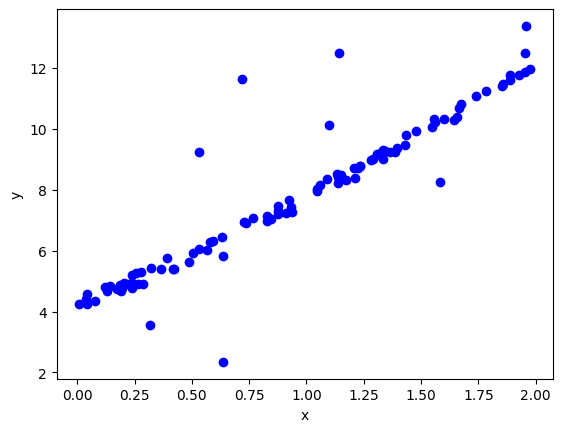

In [19]:
plt.scatter(data['x'], data['y'], color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

intercept: 4.010698766850716
slop: 3.9986058993181235


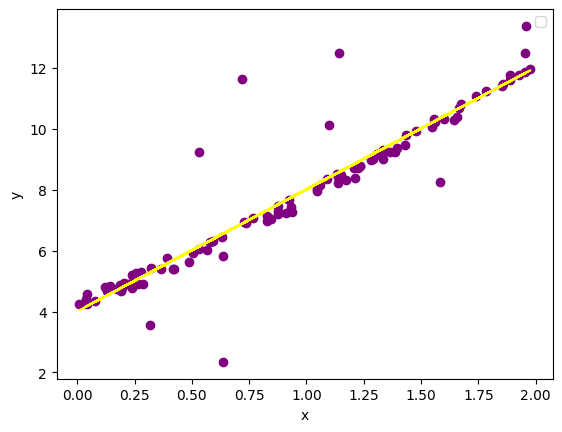

In [20]:
x_b=np.c_[np.ones((100,1)),x]
theta_best=np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

print('intercept:',theta_best[0][0])
print('slop:', theta_best[1][0])

#predict
y_pred=x_b.dot(theta_best)
plt.scatter(data['x'],data['y'],color='purple')
plt.plot(data['x'],y_pred,color='yellow')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

intercept: 3.799357792568158
slop: 4.152743985480314


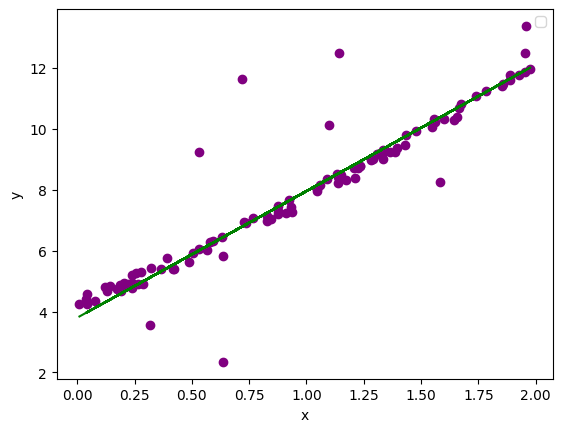

In [25]:
learning_rate=0.1
iterations=10
m=len(x)
theta=np.random.rand(2,1)

for i in range(iterations):
  gradient=2/m*x_b.T.dot(x_b.dot(theta)-y)
  theta = theta - learning_rate* gradient

print('intercept:', theta[0][0])
print('slop:', theta[1][0])
y_pred_g=x_b.dot(theta)
plt.scatter(data['x'],data['y'],color='purple')
plt.plot(data['x'],y_pred_g,color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [29]:
from sklearn.metrics import mean_squared_error
mse_ls=mean_squared_error(y,y_pred)
mse_g=mean_squared_error(y,y_pred_g)

print(f'mse LS: {mse_ls}')
print(f'mse GD: {mse_g}')

mse LS: 0.8226700658935755
mse GD: 0.834871135729028
